In [1]:
import numpy as np

In [2]:
import sys
sys.path.append('/home/anis/GitHub/UniaxialBending')

In [3]:
import UniaxialBendingDesignModule as ub
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Sign Convension Followed in Program

GREEN - X AXIS

RED   - Y AXIS

BLUE  - Z AXIS

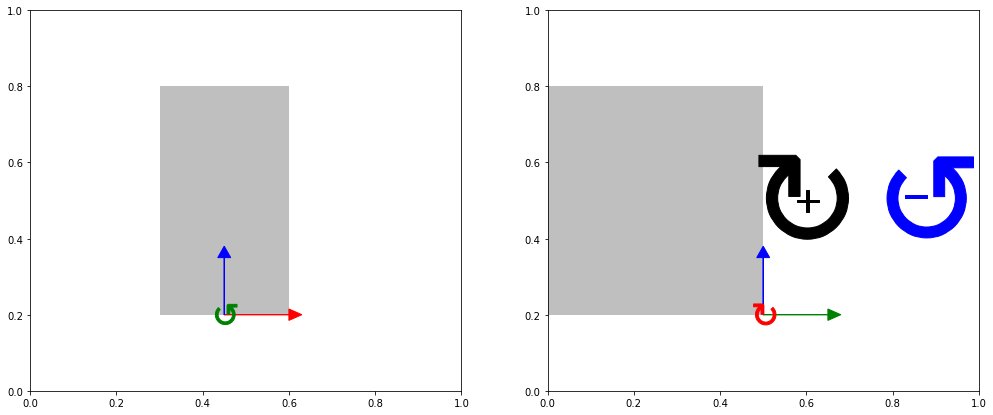

In [4]:
f, ax = plt.subplots(1,2,figsize=(17,7))
p = patches.Rectangle(
    (0.3, 0.2), 0.3, 0.6,
    facecolor='gray', clip_on=False,alpha=0.5
    )
ax[0].add_patch(p)
ax[0].arrow(0.45, 0.2, 0.15, 0., head_width=0.03, head_length=0.03, fc='r', ec='r')
ax[0].arrow(0.45, 0.2, 0., 0.15, head_width=0.03, head_length=0.03, fc='b', ec='b')
ax[0].plot([0.45],[0.2],marker=r'$\circlearrowleft$',ms=25, c='g')
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])

p = patches.Rectangle(
    (0.0, 0.2), 0.5, 0.6,
    facecolor='gray', clip_on=False,alpha=0.5
    )
ax[1].add_patch(p)
ax[1].arrow(0.5, 0.2, 0.15, 0., head_width=0.03, head_length=0.03, fc='g', ec='g')
ax[1].arrow(0.5, 0.2, 0., 0.15, head_width=0.03, head_length=0.03, fc='b', ec='b')
ax[1].plot([0.5],[0.2],marker=r'$\circlearrowright$',ms=25, c='r')
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])
ax[1].plot([0.58],[0.5],marker=r'$\circlearrowright$',ms=100, c='k')
ax[1].plot([0.87],[0.5],marker=r'$\circlearrowleft$',ms=100, c='b')
ax[1].plot([0.6],[0.5],marker=r'$+$',ms=25, c='k')
ax[1].plot([0.85],[0.5],marker=r'$-$',ms=25, c='b')
plt.savefig('SIGN.pdf',bbox_inches = 'tight', pad_inches = 0)

# Testing of Individual Class Function

## Testig read_inp Class Function

In [5]:
SECTION1 = ub.UniaxialBendingSection('sample_section.dat')

In [6]:
SECTION1.width

0.3

In [7]:
SECTION1.depth

0.7

In [8]:
SECTION1.reinforcement

[[0.6549999999999999, 0.0009817477042468104], [0.045, 0.001963495408493621]]

In [9]:
SECTION1.concrete.fck, SECTION1.concrete.FOS

(20000000.0, 1.5)

In [10]:
SECTION1.steel.fy, SECTION1.steel.FOS, SECTION1.steel.Es

(415000000.0, 1.15, 210000000000.0)

In [11]:
SECTION1.mesh

array([0.    , 0.0007, 0.0014, ..., 0.6986, 0.6993, 0.7   ])

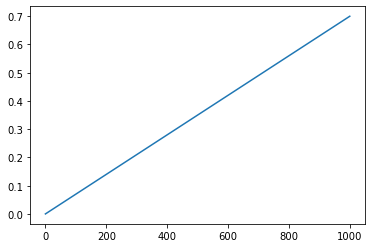

In [12]:
plt.plot(SECTION1.mesh_center)

In [13]:
SECTION1.mesh_dz, SECTION1.positive_effective_depth, SECTION1.negative_effective_depth

(0.0007, 0.6549999999999999, 0.6549999999999999)

In [14]:
SECTION1.depth

0.7

## Testing Strain Distribution Class Methods

### strain_distribution Class Method

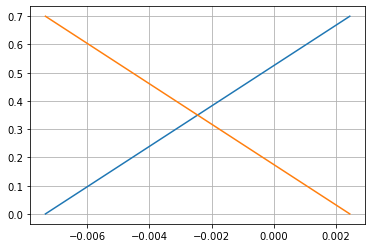

In [15]:
strain = SECTION1.strain_distribution(0.75*SECTION1.depth,0.0035/0.25)
plt.plot(strain,SECTION1.mesh_center)
strain = SECTION1.strain_distribution(0.25*SECTION1.depth,0-.0035/0.25)
plt.plot(strain,SECTION1.mesh_center)
plt.grid()

### strain_distribution_capacity Class Method

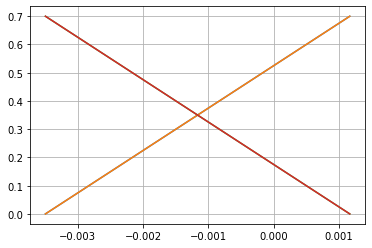

In [16]:
strain = SECTION1.strain_distribution_capacity(0.75*SECTION1.depth, True)
plt.plot(strain,SECTION1.mesh_center)
strain = SECTION1.strain_distribution(0.75*SECTION1.depth,0.0035/(0.75*SECTION1.depth))
plt.plot(strain,SECTION1.mesh_center)

strain = SECTION1.strain_distribution_capacity(0.75*SECTION1.depth, False)
plt.plot(strain,SECTION1.mesh_center)
strain = SECTION1.strain_distribution(0.25*SECTION1.depth,-0.0035/(0.75*SECTION1.depth))
plt.plot(strain,SECTION1.mesh_center)
plt.grid()

### strain_distribution_compr Class Method

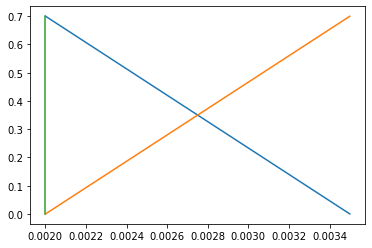

In [17]:
strain = SECTION1.strain_distribution_compr(0.0035,0.002)
plt.plot(strain,SECTION1.mesh_center)
strain = SECTION1.strain_distribution_compr(0.002,0.0035)
plt.plot(strain,SECTION1.mesh_center)
strain = SECTION1.strain_distribution_compr(0.002,0.002)
plt.plot(strain,SECTION1.mesh_center)

### concrete_stress and steel_stress Class Method

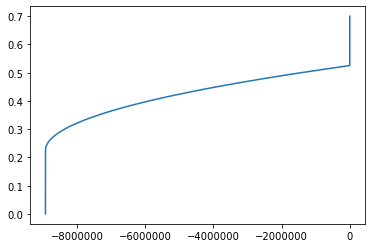

In [18]:
strain = SECTION1.strain_distribution_capacity(0.75*SECTION1.depth, True)
stress = SECTION1.concrete_stress(strain)
s_stress = SECTION1.steel_stress(strain)
plt.plot(stress,SECTION1.mesh_center)

In [19]:
strain = SECTION1.strain_distribution_compr(0.02,0.02)
s_stress = SECTION1.steel_stress(strain)
print(s_stress)

[3.60869565e+08 3.60869565e+08]


### concrete_total_force and steel_total_force Class Method

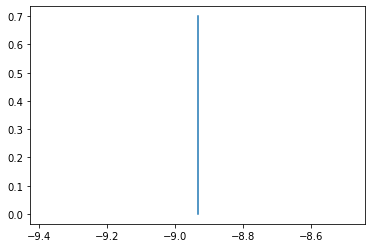

In [20]:
strain = SECTION1.strain_distribution_compr(-0.0035,-0.0035)
stress = SECTION1.concrete_stress(strain)
force = SECTION1.concrete_total_force(strain)
plt.plot(stress/10**6,SECTION1.mesh_center)

In [21]:
force/10**3

-1876.0

In [22]:
(SECTION1.concrete.fck*0.67/1.5)*SECTION1.width*SECTION1.depth/10**3

1875.9999999999998

In [23]:
SECTION1.concrete(-0.0035)/10**6

-8.933333333333334

### concrete_total_moment and steel_total_moment Class Method

In [24]:
SECTION1.concrete_total_moment(strain,0.5*SECTION1.depth)

-2.8421709430404007e-11

In [25]:
SECTION1.concrete_total_moment(strain,0)

-656600.0000000007

In [26]:
force*0.5*SECTION1.depth

-656600.0

In [27]:
SECTION1.steel_total_moment(strain,0.5*SECTION1.depth)

105381.33924650139

### balance_section_capacity Class Method


Page 156, Ex 4.16

In [28]:
SECTION2 = ub.UniaxialBendingSection('PillaiEx4p16b.dat')

In [29]:
na_z = SECTION2.balance_section_capacity(postive=False)

In [30]:
SECTION2.estimate_maxm_neutral_axis_depth()
SECTION2.max_positive_na

0.3151656388928724

In [31]:
na_z = SECTION2.balance_section_capacity(postive=False)
print(na_z)

0.5644436363130805


### estimate_moment_curvature Class Method

In [32]:
SECTION2.estimate_moment_curvature()

In [33]:
strain = SECTION2.strain_distribution_capacity(0.07*SECTION2.depth, True)
stress = SECTION2.concrete_stress(strain)

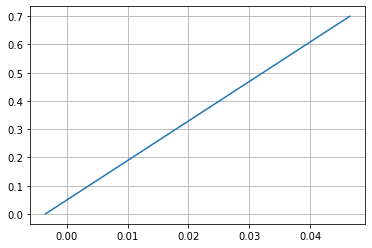

In [34]:
plt.plot(strain,SECTION2.mesh_center)
plt.grid()

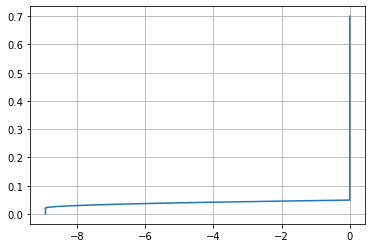

In [35]:
plt.plot(stress/10**6,SECTION2.mesh_center)
plt.grid()

In [36]:
SECTION2.MomentCapacity

{'POSITIVE': {'Neutral Axis': 0.07335364011814818,
  'Capacity': 536396.0949362534,
  'PHI': 0.047714060193368324,
  'Est': 0.029899842135357825},
 'NEGATIVE': {'Neutral Axis': 0.5644436363130805,
  'Capacity': -694670.120810101,
  'PHI': -0.025819518204867078,
  'Est': 0.014573662743406953}}

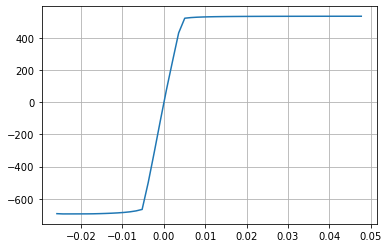

In [37]:
plt.plot(SECTION2.moment_curvature['PHI'],SECTION2.moment_curvature['Mp']/1000)
plt.grid()

In [38]:
SECTION2.gen_axial_moment_inter()

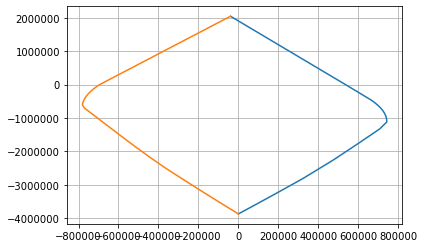

In [39]:
plt.plot(SECTION2.axial_moment_interaction['Mu_p'],SECTION2.axial_moment_interaction['Pu_p'])
plt.plot(SECTION2.axial_moment_interaction['Mu_n'],SECTION2.axial_moment_interaction['Pu_n'])
plt.grid()

In [40]:
Est_positive_set = np.linspace(-0.002,SECTION2.MomentCapacity['POSITIVE']['Est'],101)

1.7462298274040222e-10 -3874.9976273592074
2322.015522040703 -3866.3356359688637
55159.26966991958 -3697.245202062244
113046.73351671704 -3509.5636293522175
175578.22840759606 -3304.5580738615004
242753.75434255597 -3082.2285355900963
314573.31132159714 -2842.5750145380002
391432.5659777434 -2572.7289150754223
462173.11498497747 -2308.155818186304
526142.8121849423 -2059.209874392058
585261.2635637478 -1823.2872189465393
640961.5688516155 -1597.899682866702
694219.6108594589 -1381.1551844776263
741536.1069948396 -1184.6211905710493
742635.155614578 -1134.2914450427686
742794.1320911268 -1089.071704137039
742263.6251293682 -1048.2201213204864
741227.8415017525 -1011.1319693510209
739823.4758593229 -977.3129610039423
738152.9859855232 -946.3475357513337
736293.5001680838 -917.8885965097422
734303.45353774 -891.6443892365274
732227.2785413398 -867.3658111850923
730098.8545791222 -844.8400934829251
727943.9960748784 -823.8833771315509
725782.4329221756 -804.3375315660511
723629.2532230394 

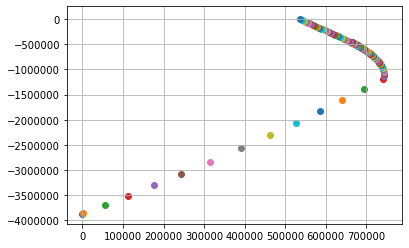

In [41]:
ESc = np.zeros(len(Est_positive_set))
for i,e in enumerate(Est_positive_set):
    ESc[i] = SECTION2.compressive_strain_given_tension(e)
    strain = SECTION1.strain_distribution_compr(ESc[i],e)
#    plt.plot(strain,SECTION2.mesh_center)
    plt.scatter(SECTION2.sectional_moment(strain,SECTION2.centroid),\
                SECTION2.sectional_force(strain))
    print(SECTION2.sectional_moment(strain,SECTION2.centroid),\
          SECTION2.sectional_force(strain)/1000)
plt.grid()

In [42]:
SECTION2.axial_moment_interaction['Mu_p']

array([ 1.74622983e-10,  5.74311156e+04,  1.80887866e+05,  3.23686687e+05,
        4.73027333e+05,  5.96868987e+05,  7.06972439e+05,  7.42764034e+05,
        7.41973503e+05,  7.39236198e+05,  7.35494216e+05,  7.31276416e+05,
        7.26885132e+05,  7.22494168e+05,  7.18202611e+05,  7.14064884e+05,
        7.10108883e+05,  7.06345887e+05,  7.02778640e+05,  6.99402139e+05,
        6.96210017e+05,  6.93192352e+05,  6.90340061e+05,  6.87642136e+05,
        6.85089879e+05,  6.82673334e+05,  6.80382752e+05,  6.78209204e+05,
        6.76146394e+05,  6.74186241e+05,  6.72320800e+05,  6.70549747e+05,
        6.68871215e+05,  6.67278814e+05,  6.65768397e+05,  6.64334600e+05,
        6.62972972e+05,  6.52975092e+05,  6.42968378e+05,  6.33024833e+05,
        6.23139374e+05,  6.13309518e+05,  6.03532243e+05,  5.93806338e+05,
        5.84129391e+05,  5.74497189e+05,  5.64910192e+05,  5.55365978e+05,
        5.45861605e+05,  5.36396095e+05, -3.95179146e+04])

In [43]:
VV = SECTION2.steel.max_tensile_strain
UU = SECTION2.steel.max_tensile_strain
strain = SECTION1.strain_distribution_compr(UU,VV)

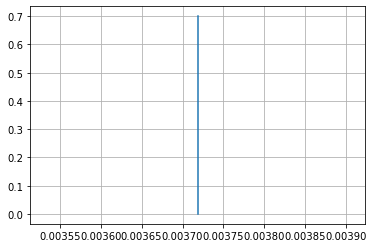

In [44]:
plt.plot(strain,SECTION2.mesh_center)
plt.grid()

In [45]:
print(SECTION2.sectional_moment(strain,SECTION2.centroid),\
          SECTION2.sectional_force(strain)/1000)

-39517.91462147469 2049.7389563839074


In [46]:
def create_section_figure(ax):
    p = patches.Rectangle(
    (0.0, 0.0), SECTION2.width, SECTION2.depth,
    facecolor='gray', clip_on=False,alpha=0.5
    )
    ax.add_patch(p)
    ax.set_xlim([-0.1,SECTION2.width+0.1])
    ax.set_ylim([-0.1,SECTION2.depth+0.1])
    with open('PillaiEx4p16b.dat','r') as fID:
        data = fID.readlines()
    for line in data:
        temp = line.strip().split(',')
        if (temp[0] == 'T') or (temp[0] == 'B'):
            rein_force_no = sum([int(bar) for bar in temp[2::2]])
            x = np.linspace(0.03, SECTION2.width-0.03,rein_force_no)
            if temp[0] == 'T':
                y = x*0.0 + (SECTION2.depth - float(temp[1]))
            else:
                y = x*0.0 + float(temp[1])
            ax.scatter(x,y,c='k')
    ax.axhline(y=SECTION2.centroid, c='r', lw=0.25)
            

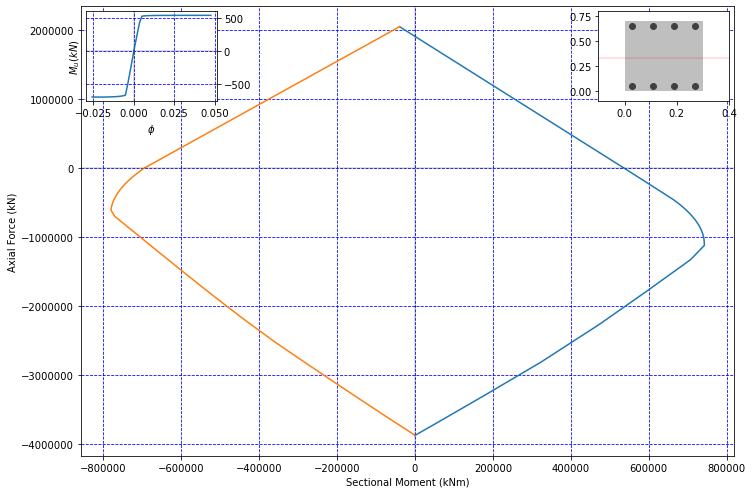

In [47]:
plt.figure(figsize=(11.7,8.27))
plt.plot(SECTION2.axial_moment_interaction['Mu_p'],SECTION2.axial_moment_interaction['Pu_p'])
plt.plot(SECTION2.axial_moment_interaction['Mu_n'],SECTION2.axial_moment_interaction['Pu_n'])
plt.grid(b=True, which='major', color='b', linestyle='--')
plt.axhline(y=0, color='k',lw=0.25)
plt.axvline(x=0, color='k',lw=0.25)
plt.xlabel('Sectional Moment (kNm)')
plt.ylabel('Axial Force (kN)')
ax1 = plt.gca()
ax2 = inset_axes(ax1,
                   width="20%",  # width = 30% of parent_bbox
                   height="20%",  # height : 1 inch
                   loc=1)
ax3 = inset_axes(ax1,
                   width="20%",  # width = 30% of parent_bbox
                   height="20%",  # height : 1 inch
                   loc=2)
create_section_figure(ax2)
ax3.yaxis.set_ticks_position('right')
ax3.grid(b=True, which='major', color='b', linestyle='--')
ax3.plot(SECTION2.moment_curvature['PHI'],SECTION2.moment_curvature['Mp']/1000)
ax3.axhline(y=0, color='k',lw=0.25)
ax3.axvline(x=0, color='k',lw=0.25)
ax3.set_xlabel(r'$\phi$')
ax3.set_ylabel(r'$M_u (kN)$')
plt.savefig('sample.pdf',bbox_inches = 'tight', pad_inches = 0.1)

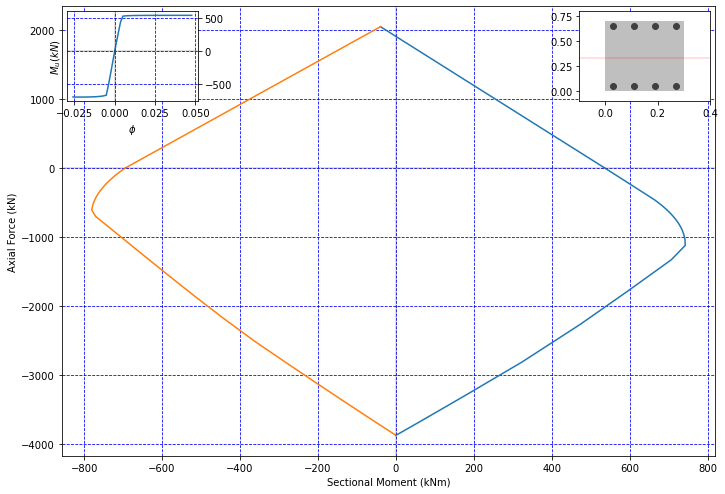

In [48]:
SECTION2.create_interaction_figure()
plt.show()